<a href="https://colab.research.google.com/github/tushar821999/Pandas_Library/blob/master/Amazon_Forest_Fire_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![Output Image](https://miro.medium.com/max/1578/1*tZFPeK5p6D_ns8Yhzz90tw.png)

***Dataset*** used ['**Amazon**.csv'](https://storage.googleapis.com/kaggle-data-sets/316056/639173/bundle/archive.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1580045587&Signature=pXk7mhIoHHvwkqo4OjOjuE7kiSXXDGrAulzIHcmHOsO7w8YdcpSl6MK3dl8zwmzEC%2FV%2BC4MwSUyv9obP0Pd0KqHEH9SO3LPhAdj9B8g4aF1XmgyqIdF4Inj7izD49cYeaAHIrZ%2FIxcpl7Pz3MzxKPvq8DjxTPHYGsXO4ZvIQxhbhZ8X13u3PFU0psdX1Pi84jd8BPz4inXF%2BIooBzRbDVSZKNfn9cngWr0mfgJ%2BVJFPW1HOO2X4RuqUAHIJOdtYirKVVcP%2BBChWCbNl1PRx7o6kZXu1Wf0G%2FGpkczj%2FSuq8OQjlGRw2BCEo0vxmwaGcb4u2WOgsd9k457BRyV2in1w%3D%3D&response-content-disposition=attachment%3B+filename%3Dforest-fires-in-brazil.zip)

***ABOUT THE DATA*** :

1. **Year** is the year when the forest fire happend;

2. **State** is the Brazillian state

3. **Month** is the month when the forest fire happend

4. **Number** is the number of forest fires reported

5. **Date** is the date when the forest fire was reported




In [5]:
import pandas as pd
df = pd.read_csv('/amazon.csv')
print(df)

      year      state     month  number        date
0     1998       Acre   Janeiro     0.0  1998-01-01
1     1999       Acre   Janeiro     0.0  1999-01-01
2     2000       Acre   Janeiro     0.0  2000-01-01
3     2001       Acre   Janeiro     0.0  2001-01-01
4     2002       Acre   Janeiro     0.0  2002-01-01
...    ...        ...       ...     ...         ...
6449  2012  Tocantins  Dezembro   128.0  2012-01-01
6450  2013  Tocantins  Dezembro    85.0  2013-01-01
6451  2014  Tocantins  Dezembro   223.0  2014-01-01
6452  2015  Tocantins  Dezembro   373.0  2015-01-01
6453  2016  Tocantins  Dezembro   119.0  2016-01-01

[6454 rows x 5 columns]


***PROBLEMS WITH THE DATASET***
1. Numbers are in decimal. 2.588 doesn't make sense. That's because the decimal is how thousands are formatted. So, 2.588 means 2588 forest fires.
2. Month column is in Portuguese Language
3. When i imported the file for the first time i got an error : "utf-8 codec can't decode byte in position : invalid continuation byte". So, You can simple download the error free dataset from [here](https://drive.google.com/open?id=1YeK62eIi_nrYZYeZAthGhMibClVhlgWYmdOWqU7RNqM).

***INSTALL THE GOOGLETRANS LIBRARY***

In [10]:
# googletrans is not already installed 
# install googletrans by using pip
pip install googletrans

***IMPORT THE REQUIRED LIBRARIES***

In [0]:
# pandas for data analysis
import pandas as pd
# googletrans for translate portuguese in english
import googletrans
# matplotlib for plotting the bar graph
import matplotlib.pyplot as plt

***NOW READ THE DATA***

First problem of decimal number can be solved by using the thousands parameter of read_csv function.

In [21]:
# read data and solving the first problem
data = pd.read_csv('/amazon.csv',thousands='.')
# print the no of rows and columns (rows*columns)
print("") #for NL
print(data.shape)
# print the first 5 records of dataset
print("") #for NL
print(data.head(5))
# print the description of the dataset
print("") #for NL
print(data.describe(include='all'))
# check for any missing values per column
print("") #for NL
print(data.isna().sum())


(6454, 5)

   year state    month  number        date
0  1998  Acre  Janeiro       0  1998-01-01
1  1999  Acre  Janeiro       0  1999-01-01
2  2000  Acre  Janeiro       0  2000-01-01
3  2001  Acre  Janeiro       0  2001-01-01
4  2002  Acre  Janeiro       0  2002-01-01

               year state    month        number        date
count   6454.000000  6454     6454   6454.000000        6454
unique          NaN    23       12           NaN          20
top             NaN   Rio  Janeiro           NaN  2001-01-01
freq            NaN   717      541           NaN         324
mean    2007.461729   NaN      NaN    522.696312         NaN
std        5.746654   NaN      NaN   1554.846486         NaN
min     1998.000000   NaN      NaN      0.000000         NaN
25%     2002.000000   NaN      NaN      9.000000         NaN
50%     2007.000000   NaN      NaN     54.000000         NaN
75%     2012.000000   NaN      NaN    269.000000         NaN
max     2017.000000   NaN      NaN  25963.000000         N

***CREATING SUBSET OF DATA***

In [25]:
# we sum all the number of forest fire from year 1998 to 2017
# according to months
forest_fire_per_month = data.groupby('month')['number'].sum()
# print the subset
print(forest_fire_per_month)

month
Abril          28364
Agosto        740841
Dezembro      152596
Fevereiro      30952
Janeiro        52587
Julho         217620
Junho         111405
Maio           46083
Março          35118
Novembro      312326
Outubro       629665
Setembro     1015925
Name: number, dtype: int64


Now we notice the result is in alphabetical order. To get it back to the monthly order,we use the reindex property of dataframes

In [31]:
# extract the unique month
month_unique = list(data.month.unique())
# reindex according to the unique month
forest_fire_per_month = forest_fire_per_month.reindex(month_unique,axis=0)
print(forest_fire_per_month)

month
Janeiro        52587
Fevereiro      30952
Março          35118
Abril          28364
Maio           46083
Junho         111405
Julho         217620
Agosto        740841
Setembro     1015925
Outubro       629665
Novembro      312326
Dezembro      152596
Name: number, dtype: int64


Now we convert the series into a dataframe

In [41]:
#forest_fire_per_month = forest_fire_per_month.to_frame()
print(forest_fire_per_month.head(12))
# Set a default index
forest_fire_per_month.reset_index(level=0,inplace=True)

        month   number
0     Janeiro    52587
1   Fevereiro    30952
2       Março    35118
3       Abril    28364
4        Maio    46083
5       Junho   111405
6       Julho   217620
7      Agosto   740841
8    Setembro  1015925
9     Outubro   629665
10   Novembro   312326
11   Dezembro   152596


***Plot the graph***

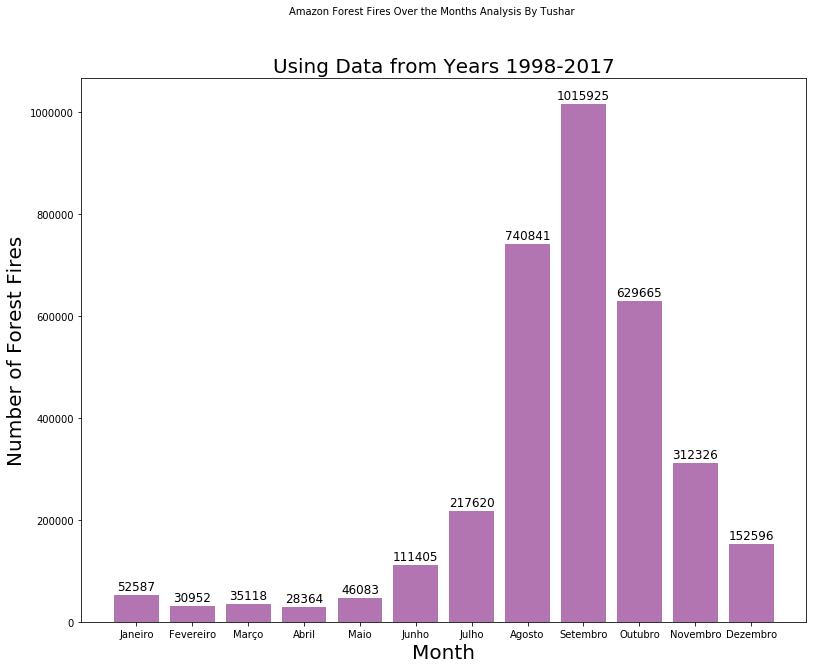

In [57]:
#specify width and height
plt.figure(figsize=(13,10))
#plt.bar(x-value,y-value)
plt.bar(forest_fire_per_month['month'],forest_fire_per_month['number'],color=(0.5,0.1,0.5,0.6))

# basic details for bar graphs
plt.suptitle('Amazon Forest Fires Over the Months Analysis By Tushar',fontsize=10)
plt.title('Using Data from Years 1998-2017', fontsize=20)
plt.xlabel('Month',fontsize=20)
plt.ylabel('Number of Forest Fires', fontsize=20)

# indicating the value of each bar in bar graph
for i,num in enumerate(forest_fire_per_month['number']):
  plt.text(i,num+10000,num,ha='center',fontsize=12)